In [43]:
import ISLP
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
data = ISLP.load_data("Smarket")

X, y = data.drop("Direction", axis="columns"), data["Direction"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X

,Year,Lag1,Lag2,Lag3,Lag4,Lag5,Volume,Today
0,2001,0.381,-0.192,-2.624,-1.055,5.010,1.19130,0.959
1,2001,0.959,0.381,-0.192,-2.624,-1.055,1.29650,1.032
2,2001,1.032,0.959,0.381,-0.192,-2.624,1.41120,-0.623
3,2001,-0.623,1.032,0.959,0.381,-0.192,1.27600,0.614
4,2001,0.614,-0.623,1.032,0.959,0.381,1.20570,0.213
...,...,...,...,...,...,...,...,...
1245,2005,0.422,0.252,-0.024,-0.584,-0.285,1.88850,0.043
1246,2005,0.043,0.422,0.252,-0.024,-0.584,1.28581,-0.955
1247,2005,-0.955,0.043,0.422,0.252,-0.024,1.54047,0.130
1248,2005,0.130,-0.955,0.043,0.422,0.252,1.42236,-0.298


              precision    recall  f1-score   support

        Down       0.99      0.93      0.96       191
          Up       0.93      0.99      0.96       184

    accuracy                           0.96       375
   macro avg       0.96      0.96      0.96       375
weighted avg       0.96      0.96      0.96       375



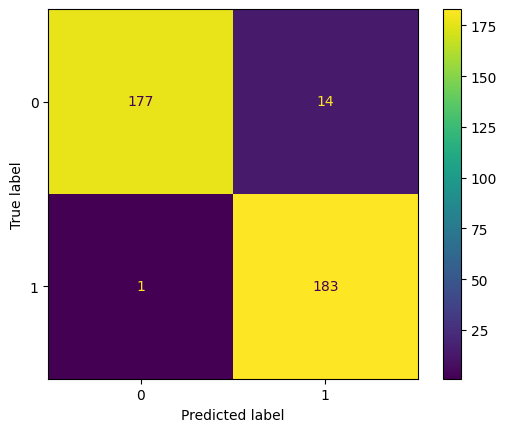

In [44]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix, classification_report

model = GaussianNB()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

        Down       0.89      0.75      0.81       191
          Up       0.78      0.90      0.83       184

    accuracy                           0.82       375
   macro avg       0.83      0.83      0.82       375
weighted avg       0.83      0.82      0.82       375



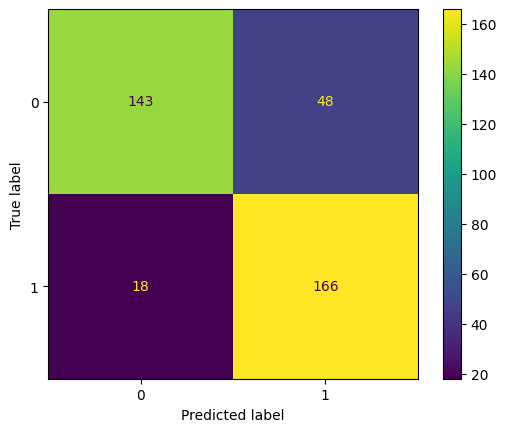

In [45]:
from sklearn.naive_bayes import ComplementNB
from sklearn.preprocessing import MinMaxScaler

model = ComplementNB()
scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

        Down       1.00      0.01      0.02       191
          Up       0.49      1.00      0.66       184

    accuracy                           0.50       375
   macro avg       0.75      0.51      0.34       375
weighted avg       0.75      0.50      0.33       375



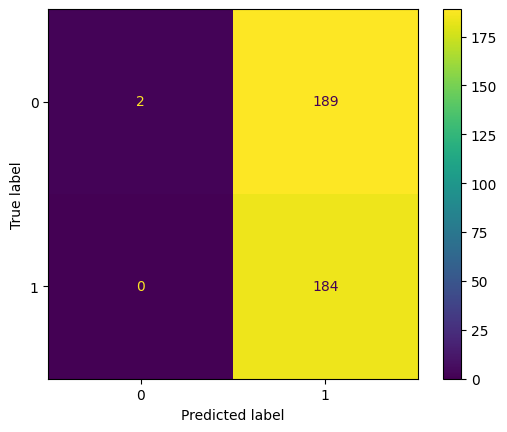

In [46]:
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()

scaler = MinMaxScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)
model.fit(scaled_X_train, y_train)
y_pred = model.predict(scaled_X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()

              precision    recall  f1-score   support

        Down       1.00      1.00      1.00       191
          Up       1.00      1.00      1.00       184

    accuracy                           1.00       375
   macro avg       1.00      1.00      1.00       375
weighted avg       1.00      1.00      1.00       375



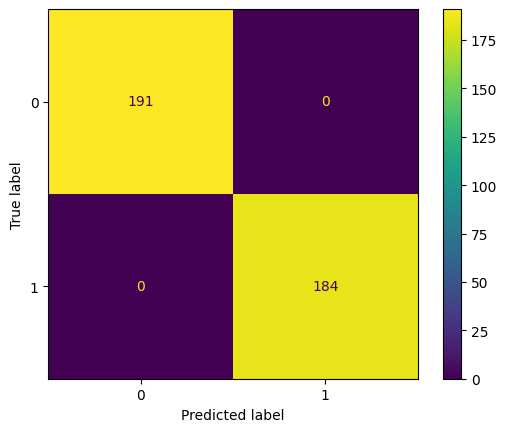

In [48]:
from sklearn.naive_bayes import BernoulliNB
model = BernoulliNB()


model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(cm).plot()